Dataset Preview:
   Age  Annual Income  Credit Score  Loan Amount  Existing Loan  \
0   56          29930           839     11046.63              1   
1   69          23285           811     22604.82              0   
2   46         143637           510     48708.27              0   
3   32          55863           552     20801.20              1   
4   60          36704           337     44052.26              0   

   Debt to Income  Has Default  
0            0.33            0  
1            0.83            0  
2            0.24            1  
3            0.10            0  
4            0.40            0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             10000 non-null  int64  
 1   Annual Income   10000 non-null  int64  
 2   Credit Score    10000 non-null  int64  
 3   Loan Amount     10000 non-null

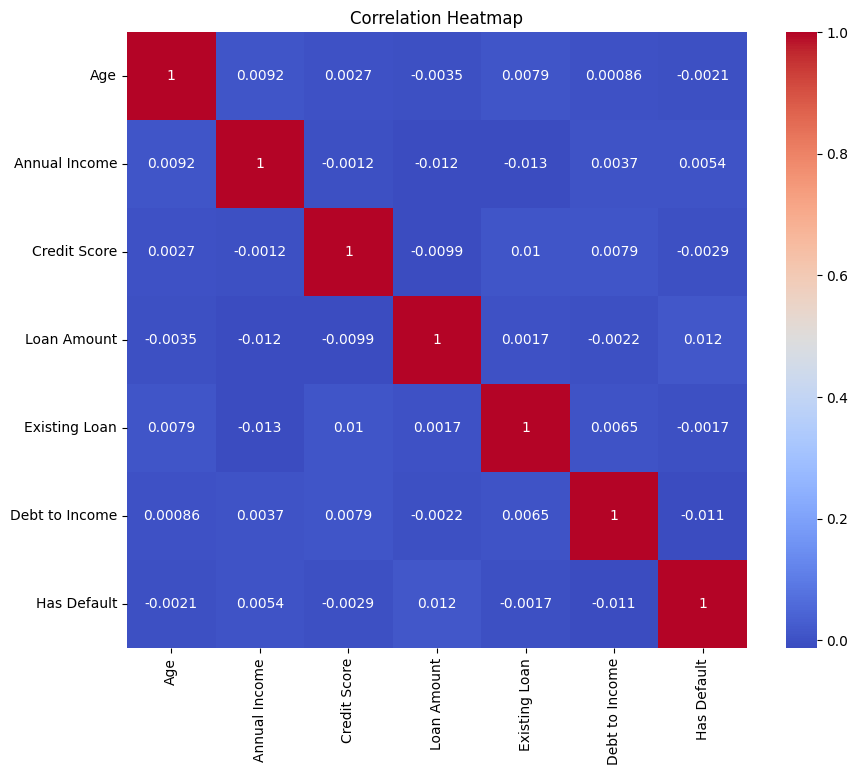

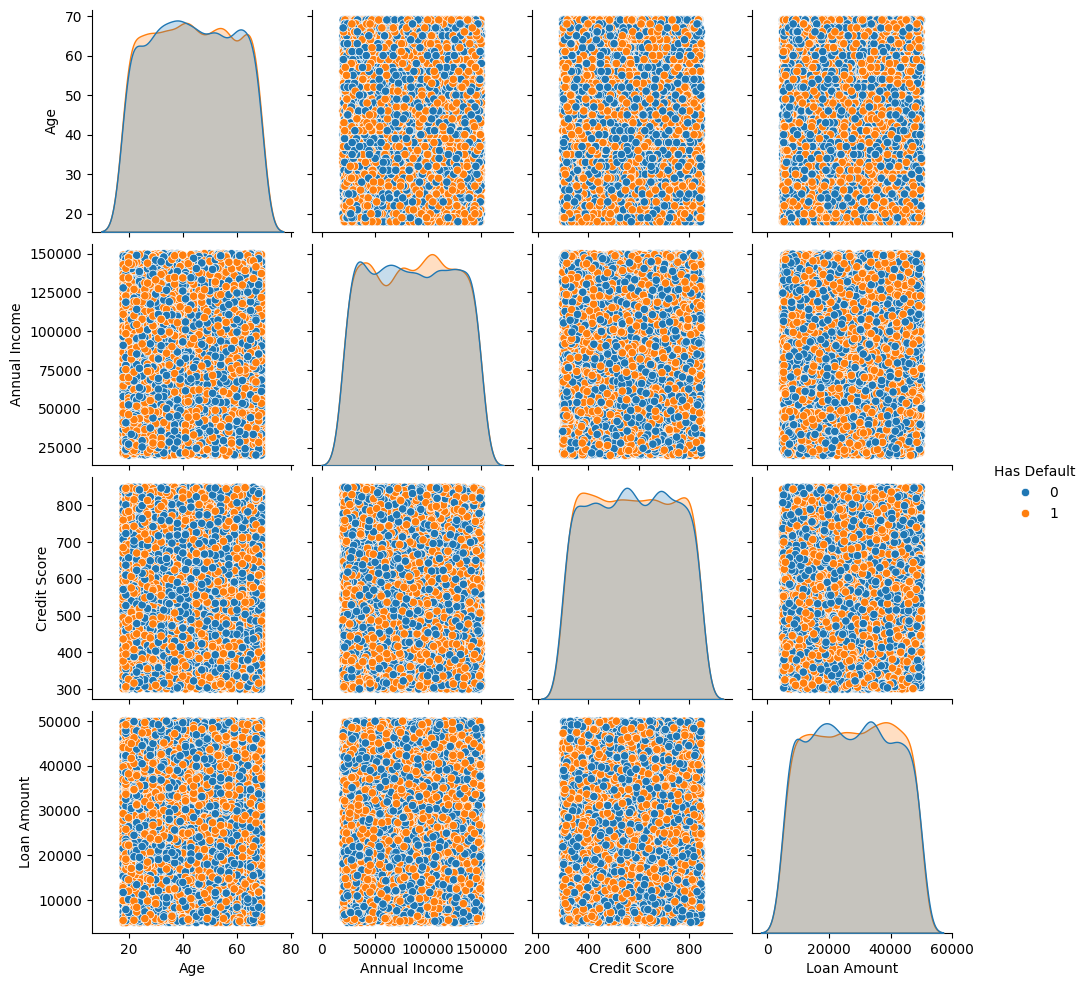


Processed data has been saved to: data/processed/processed_credit_data.csv


In [50]:
# Data Exploration and Preprocessing
# This notebook explores the raw dataset, processes it, and generates the processed data.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

# Load raw data
raw_path = 'data/raw/raw_credit_data.csv'
data = pd.read_csv(raw_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Basic dataset information
print("\nDataset Info:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)

# Handle missing values (Example: fill with median for numerical columns and mode for categorical)
data.fillna({
    'Age': data['Age'].median(),
    'Annual Income': data['Annual Income'].median(),
    'Credit Score': data['Credit Score'].median(),
    'Loan Amount': data['Loan Amount'].median(),
    'Existing Loan': data['Existing Loan'].mode()[0],
    'Debt to Income': data['Debt to Income'].median(),
}, inplace=True)

# Confirm that there are no missing values
print("\nMissing Values After Imputation:")
print(data.isnull().sum())

# Check the distribution of the target variable
if 'Has Default' in data.columns:
    print("\nTarget Variable Distribution:")
    print(data['Has Default'].value_counts())

# Encode categorical variables if any (Assuming 'Existing Loan' is categorical)
# Encoding categorical variables: Let's assume that 'Existing Loan' is categorical.
data['Existing Loan'] = data['Existing Loan'].astype('category')

# Show the unique categories for 'Existing Loan' column
print("\nUnique Categories in 'Existing Loan':")
print(data['Existing Loan'].unique())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features (This is useful for visualizing relationships in the data)
selected_features = ['Age', 'Annual Income', 'Credit Score', 'Loan Amount', 'Has Default']
sns.pairplot(data[selected_features], hue='Has Default', diag_kind='kde')
plt.show()

# Define the path for the processed data directory
processed_dir = 'data/processed/'

# Create the processed directory if it does not exist
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# Define the path for saving the processed data
processed_path = os.path.join(processed_dir, 'processed_credit_data.csv')

# Saving the processed data to CSV (processed_credit_data.csv)
data.to_csv(processed_path, index=False)
print(f"\nProcessed data has been saved to: {processed_path}")












